Peut-on établir un lien entre la densité de médecins par spécialité et par territoire et la pratique du dépassement d'honoraires ? Est-ce dans les territoires où la densité est la plus forte que les médecins pratiquent le moins les dépassements d'honoraires ? Est-ce que la densité de certains médecins / praticiens est corrélée à la densité de population pour certaines classes d'âges (bébé/pédiatre, personnes âgées / infirmiers etc...) ?

C'est un sujet issu du [Hackathon "données de santé"](https://www.etalab.gouv.fr/retour-sur-le-premier-hackathon-donnees-de-sante) de Etalab (la page contient des liens vers différents jeux de données utiles, ainsi que d'autres exemples de questions que vous pouvez préférer aborder). Vous pouvez compléter ça avec des données de l'INSEE et des données sur la [démographie des médecins](http://www.data.drees.sante.gouv.fr/ReportFolders/reportFolders.aspx?IF_ActivePath=P,490,497,514).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce

In [2]:
#  TABLEAU 7. DENSITÉ DE MÉDECINS par spécialité, modes d'exercice regroupés et zone d'inscription Documentation du tableau (s’ouvre dans une nouvelle fenêtre)
df = pd.read_csv("dataset/rpps-medecins18-tab7v3_00696926638394.csv", skiprows=3, encoding='latin-1')
df = df.drop(df.index[0]).reset_index(drop=True)
df

,SPECIALITE,Ensemble des spécialités d'exercice,Spécialistes,Anatomie et cytologie pathologiques,Anesthésie-réanimation,Biologie médicale,Cardiologie et maladies vasculaires,Chirurgie générale,Chirurgie maxillo-faciale et stomatologie,Chirurgie orthopédique et traumatologie,...,Pneumologie,Psychiatrie,Radiodiagnostic et imagerie médicale,Radiothérapie,Réanimation médicale,Recherche médicale,Rhumatologie,Santé publique et médecine sociale,Généralistes,Médecine générale
0,FRANCE ENTIERE,337.9,184.8,2.5,17.2,4.5,10.7,5.3,1.7,5.1,...,4.6,23.0,13.3,1.4,0.7,0.0,3.9,2.5,153.0,153.0
1,FRANCE Métropolitaine,340.1,186.6,2.5,17.3,4.5,10.8,5.4,1.7,5.1,...,4.7,23.3,13.4,1.4,0.7,0.0,4.0,2.5,153.5,153.5
2,DROM,270.4,130.8,1.2,14.7,3.5,7.0,3.2,0.8,3.3,...,2.7,13.1,8.5,0.8,0.5,0.0,1.6,2.9,139.6,139.6
3,Auvergne-Rhône-Alpes,339.5,182.5,2.6,18.8,3.9,9.7,5.4,1.7,5.5,...,4.5,22.8,13.1,1.4,0.5,0.0,4.2,2.6,157.0,157.0
4,Bourgogne-Franche-Comté,297.2,153.1,1.7,14.1,3.9,8.4,4.4,1.2,4.9,...,4.3,18.2,11.0,1.3,0.7,0.0,2.8,2.4,144.1,144.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,971 - Guadeloupe,289.1,142.5,2.0,12.7,5.1,7.6,3.3,0.5,4.1,...,2.0,12.7,8.6,0.8,0.8,0.0,2.0,2.8,146.6,146.6
113,972 - Martinique,291.1,150.2,1.6,17.1,2.7,7.7,5.6,0.8,5.6,...,3.2,16.0,8.5,1.3,0.3,0.0,3.2,3.7,140.9,140.9
114,973 - Guyane,217.8,87.2,0.4,9.1,4.0,2.6,2.9,0.0,1.8,...,1.5,6.2,5.1,0.0,0.7,0.0,0.4,4.4,130.6,130.6
115,974 - La Réunion,324.8,159.6,1.2,19.6,3.8,9.5,2.7,1.4,3.3,...,3.8,16.7,11.4,1.0,0.5,0.0,1.6,2.9,165.2,165.2


In [3]:
df.columns

Index(['SPECIALITE', 'Ensemble des spécialités d'exercice', 'Spécialistes',
       'Anatomie et cytologie pathologiques', 'Anesthésie-réanimation',
       'Biologie médicale', 'Cardiologie et maladies vasculaires',
       'Chirurgie générale', 'Chirurgie maxillo-faciale et stomatologie',
       'Chirurgie orthopédique et traumatologie', 'Chirurgie infantile',
       'Chirurgie plastique reconstructrice et esthétique',
       'Chirurgie thoracique et cardio-vasculaire', 'Chirurgie urologique',
       'Chirurgie vasculaire', 'Chirurgie viscérale et digestive',
       'Dermatologie et vénéréologie', 'Endocrinologie et métabolisme',
       'Génétique médicale', 'Gériatrie', 'Gynécologie médicale',
       'Gynécologie-obstétrique', 'Hématologie',
       'Gastro-entérologie et hépatologie', 'Médecine du travail',
       'Médecine interne', 'Médecine nucléaire',
       'Médecine physique et réadaptation', 'Néphrologie', 'Neurochirurgie',
       'Neurologie', 'ORL et chirurgie cervico-faciale'

In [4]:
df_sample = df[['SPECIALITE', 'Spécialistes','Généralistes', 'ORL et chirurgie cervico-faciale', 'Gynécologie-obstétrique']]
df_sample = df_sample.rename(columns={'SPECIALITE':'departement', 'ORL et chirurgie cervico-faciale': 'Dentistes' , 'Gynécologie-obstétrique':'Sages-femmes'})

In [6]:
df_desite = df_sample[16:]
df_desite.loc[:, 'departement'] = df_desite.loc[:, 'departement'].str.replace('\d+ - ', '')
df_desite

,departement,Spécialistes,Généralistes,Dentistes,Sages-femmes
16,Ain,80.3,105.4,2.0,7.6
17,Aisne,119.8,110.5,2.8,17.8
18,Allier,140.0,145.0,2.9,17.9
19,Alpes-de-Haute-Provence,119.3,184.8,4.3,9.9
20,Hautes-Alpes,194.5,246.1,6.4,18.2
...,...,...,...,...,...
112,Guadeloupe,142.5,146.6,3.8,20.5
113,Martinique,150.2,140.9,3.2,13.0
114,Guyane,87.2,130.6,1.1,31.0
115,La Réunion,159.6,165.2,4.1,28.8


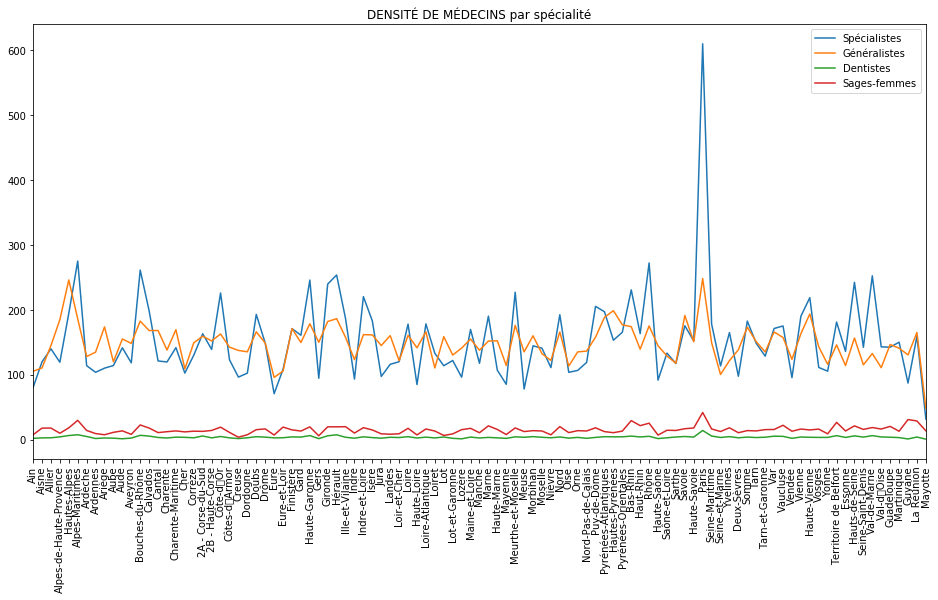

In [8]:
ax = df_desite.plot(figsize=(16, 8), xticks=df_desite.index, title="DENSITÉ DE MÉDECINS par spécialité" )
ax.set_xticklabels(df_desite['departement'], rotation=90)
plt.show()

In [9]:
# load all infos
df_ho_sp = pd.read_excel('dataset/Honoraires_des_professionnels_de_sante_APE_par_departement_en_2017.xls', sheet_name='Spécialistes', usecols=[1, 4])
df_ho_ge = pd.read_excel('dataset/Honoraires_des_professionnels_de_sante_APE_par_departement_en_2017.xls', sheet_name='Généralistes et MEP', usecols=[1, 4])
df_ho_de = pd.read_excel('dataset/Honoraires_des_professionnels_de_sante_APE_par_departement_en_2017.xls', sheet_name='Dentistes et ODF', usecols=[1, 4])
df_ho_sf = pd.read_excel('dataset/Honoraires_des_professionnels_de_sante_APE_par_departement_en_2017.xls', sheet_name='Sages-femmes', usecols=[1, 4])
# extract columns usefull
df_ho_sp.columns = ['departement', 'depassements']
df_ho_ge.columns = ['departement', 'depassements']
df_ho_de.columns = ['departement', 'depassements']
df_ho_sf.columns = ['departement', 'depassements']


In [10]:
#clean
def clean_data(df):
    df = df[[isinstance(e, (float, int)) for e in df['depassements']]]
    df = df[df['departement'].str.contains('\d.*')]
    df.loc[:, 'departement'] = df.loc[:, 'departement'].str.replace('\d+- ', '')
    df.loc[:,'depassements'] = df.loc[:,'depassements'].astype(int)
    df.groupby('departement').mean()
    return df

In [11]:
df_ho_sp = clean_data(df_ho_sp)
df_ho_ge = clean_data(df_ho_ge)
df_ho_de = clean_data(df_ho_de)
df_ho_sf = clean_data(df_ho_sf)

In [12]:
def get_df_mean(df, depa_name):
    return df.groupby('departement').mean().rename(columns={'depassements': depa_name})

df_ho_sp = get_df_mean(df_ho_sp, 'dépassement Spécialistes')
df_ho_ge = get_df_mean(df_ho_ge, 'dépassement Généralistes')
df_ho_de = get_df_mean(df_ho_de, 'dépassement Sages-femmes')
df_ho_sf = get_df_mean(df_ho_sf, 'dépassement Dentistes')

In [13]:
df_depassement = reduce(lambda x, y: pd.merge(x, y, on = 'departement'), [df_ho_sp, df_ho_ge, df_ho_de, df_ho_sf])
df_depassement

,dépassement Spécialistes,dépassement Généralistes,dépassement Sages-femmes,dépassement Dentistes
departement,,,,
2A- Corse-du-Sud,2.167336e+05,2628.864407,7685879.00,153
Ain,1.183315e+06,18828.500000,17603913.00,968
Aisne,4.519048e+05,21700.183333,12364273.75,2044
Allier,6.046039e+05,2739.779661,9666326.00,660
Alpes-Hte-Provence,1.613731e+05,8747.216667,5076584.25,1109
...,...,...,...,...
Vendée,7.478706e+05,15924.859649,20296536.25,4235
Vienne,7.456448e+05,24410.824561,11486884.75,608
Vosges,3.992666e+05,6885.101695,10193987.75,256


In [14]:
df_des_ho = pd.merge(df_desite, df_depassement, on='departement')
df_des_ho

,departement,Spécialistes,Généralistes,Dentistes,Sages-femmes,dépassement Spécialistes,dépassement Généralistes,dépassement Sages-femmes,dépassement Dentistes
0,Ain,80.3,105.4,2.0,7.6,1.183315e+06,18828.500000,17603913.00,968
1,Aisne,119.8,110.5,2.8,17.8,4.519048e+05,21700.183333,12364273.75,2044
2,Allier,140.0,145.0,2.9,17.9,6.046039e+05,2739.779661,9666326.00,660
3,Hautes-Alpes,194.5,246.1,6.4,18.2,7.067311e+04,4187.603175,4225588.75,409
4,Alpes-Maritimes,275.2,186.1,7.6,29.8,7.055973e+06,264312.254902,40276381.60,55819
...,...,...,...,...,...,...,...,...,...
77,Val-de-Marne,252.5,132.7,6.2,18.7,5.386536e+06,234504.666667,48775429.00,198624
78,Guadeloupe,142.5,146.6,3.8,20.5,3.744358e+05,17677.200000,7111244.00,8575
79,Martinique,150.2,140.9,3.2,13.0,5.357454e+05,7462.089286,7137624.75,1007
80,Guyane,87.2,130.6,1.1,31.0,3.940977e+04,1483.738462,2016393.75,319


In [15]:
sp_idx = np.argsort(df_des_ho['Spécialistes'])
ge_idx = np.argsort(df_des_ho['Généralistes'])
de_idx = np.argsort(df_des_ho['Dentistes'])
sf_idx = np.argsort(df_des_ho['Sages-femmes'])

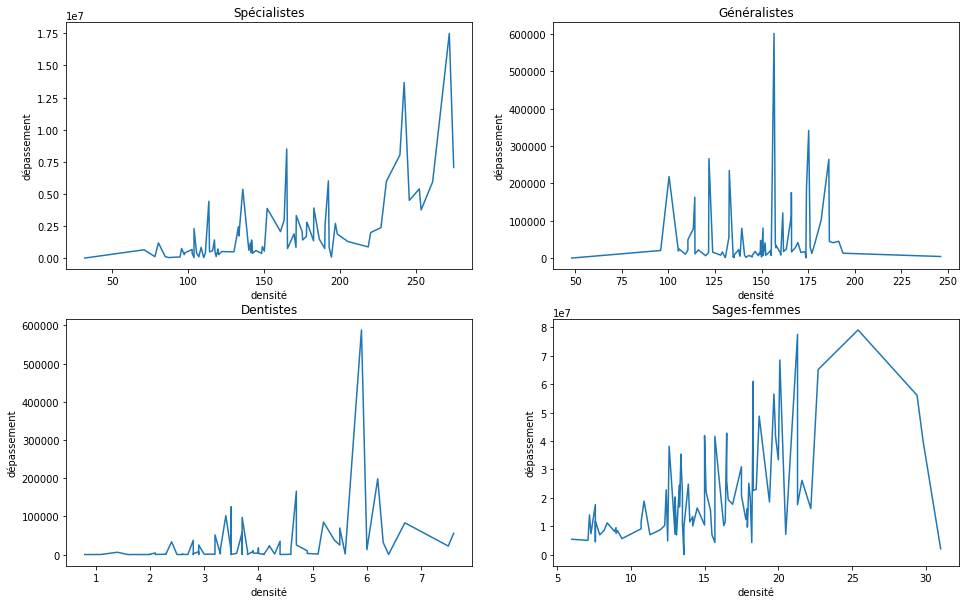

In [18]:
plt.figure(figsize=(16,10))

plt.subplot(221)
plt.plot(df_des_ho.loc[sp_idx, 'Spécialistes'], df_des_ho.loc[sp_idx, 'dépassement Spécialistes'])
plt.title('Spécialistes')
plt.xlabel('densité')
plt.ylabel('dépassement')

plt.subplot(222)
plt.plot(df_des_ho.loc[ge_idx, 'Généralistes'], df_des_ho.loc[ge_idx, 'dépassement Généralistes'])
plt.title('Généralistes')
plt.xlabel('densité')
plt.ylabel('dépassement')

plt.subplot(223)
plt.plot(df_des_ho.loc[de_idx, 'Dentistes'], df_des_ho.loc[de_idx, 'dépassement Dentistes'])
plt.title('Dentistes')
plt.xlabel('densité')
plt.ylabel('dépassement')


plt.subplot(224)
plt.plot(df_des_ho.loc[sf_idx, 'Sages-femmes'], df_des_ho.loc[sf_idx, 'dépassement Sages-femmes'])
plt.title('Sages-femmes')
plt.xlabel('densité')
plt.ylabel('dépassement')

plt.show()
